In [ ]:
!pip install Bio

     |████████████████████████████████| 271 kB 5.0 MB/s 
     |████████████████████████████████| 2.3 MB 58.5 MB/s 


# 1

In [ ]:
from Bio.Align import PairwiseAligner as pair
from Bio.Align import substitution_matrices as sub_mat
from Bio import AlignIO as alio
from Bio import SeqIO as seqio

import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving task_4_refseq.fasta to task_4_refseq.fasta


{'task_4_refseq.fasta': b'>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGCTA

In [ ]:
sequence = seqio.parse('SARS_Spike_NSP12.fasta','fasta')
a = []
for seq in sequence:
  print(seq)
  print()
  a.append(seq.seq)

ID: SARS-CoV_NSP12
Name: SARS-CoV_NSP12
Description: SARS-CoV_NSP12
Number of features: 0
Seq('SADASTFLNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNEKVAGFAKFLKTNCC...VLQ')

ID: SARS-CoV-2_NSP12
Name: SARS-CoV-2_NSP12
Description: SARS-CoV-2_NSP12
Number of features: 0
Seq('SADAQSFLNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCC...VLQ')

ID: SARS-CoV_Spike
Name: SARS-CoV_Spike
Description: SARS-CoV_Spike
Number of features: 0
Seq('MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEIFRSDTLYL...HYT')

ID: SARS-CoV-2_Spike
Name: SARS-CoV-2_Spike
Description: SARS-CoV-2_Spike
Number of features: 0
Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')



In [ ]:
al = pair()
al.mode = 'global'
al.substitution_matrix = sub_mat.load('BLOSUM62')
al.open_gap_score = -10
al.extend_gap_score = -0.5

alignments = al.align(a[0], a[1])
x = 0
print('Cov-NSP12 vs Cov-2-NSP12')
print(f'number of alignments: {len(alignments)}')
print(f'score: {alignments[0].score}')
print(f'alignment number {x}')
print(alignments[x])
print()

alignments2 = al.align(a[2], a[3])
x = 0
print('Cov-spike vs Cov-2-spike')
print(f'number of alignments: {len(alignments2)}')
print(f'score: {alignments2[0].score}')
print(f'alignment number {x}')
print(alignments2[x])


Cov-NSP12 vs Cov-2-NSP12
number of alignments: 1
score: 4867.0
alignment number 0
SADASTFLNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNEKVAGFAKFLKTNCCRFQEKDEEGNLLDSYFVVKRHTMSNYQHEETIYNLVKDCPAVAVHDFFKFRVDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQSLLKTVQFCDAMRDAGIVGVLTLDNQDLNGNWYDFGDFVQVAPGCGVPIVDSYYSLLMPILTLTRALAAESHMDADLAKPLIKWDLLKYDFTEERLCLFDRYFKYWDQTYHPNCINCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVETPHLMGWDYPKCDRAMPNMLRIMASLVLARKHNTCCNLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDHEFVDEFYAYLRKHFSMMILSDDAVVCYNSNYAAQGLVASIKNFKAVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEP

# 2

In [ ]:
gene_coordinates = {
    "NSP1": [266, 805],
    "NSP2": [806, 2719],
    "NSP3": [2720, 8554],
    "NSP4": [8555, 10054],
    "NSP5": [10055, 10972],
    "NSP6": [10973, 11842],
    "NSP7": [11843, 12091],
    "NSP8": [12092, 12685],
    "NSP9": [12686, 13024],
    "NSP10": [13025, 13441],
    "NSP11": [13442, 13480],
    "NSP12": [13442, 16236],
    "NSP13": [16237, 18039],
    "NSP14": [18040, 19620],
    "NSP15": [19621, 20658],
    "NSP16": [20659, 21552],
    "Spike": [21563, 25384],
    "NS3": [25393, 26220],
    "E": [26245, 26472],
    "M": [26523, 27191],
    "NS6": [27202, 27387],
    "NS7a": [27394, 27759],
    "NS7b": [27756, 27887],
    "NS8": [27894, 28259],
    "N": [28274, 29533],
    "NS9b": [28284, 28577],
    "NS9c": [28734, 28955]
}

In [ ]:
aln = alio.read('SARS_CoV_2_Russia_aligned.fasta', 'fasta')

In [ ]:
def coord(aln, local):
    non_gaps = -1
    for j in range(len(aln[0])):
        if aln[0][j] != "-":
            non_gaps += 1
        if non_gaps == local:
            return j

In [ ]:
mut_number = 0
start = coord(aln, gene_coordinates['Spike'][0] - 1)
end = coord(aln, gene_coordinates['Spike'][1])
spike = aln[0][start:end].seq
for i in range(len(spike)):
    if spike[i] != '-':
        for j in range(1, len(aln)):
            if aln[j][start:end].seq[i] != spike[i]:
                mut_number += 1
print(mut_number/(len(spike) * len(aln)))

In [ ]:
mut_number = 0
start = coord(aln, gene_coordinates['NSP12'][0] - 1)
end = coord(aln, gene_coordinates['NSP12'][1])
nsp12 = aln[0][start:end].seq
for i in range(len(nsp12)):
    if nsp12[i] != '-':
        for j in range(1, len(aln)):
            if aln[j][start:end].seq[i] != nsp12[i]:
                mut_number += 1
print(mut_number/(len(nsp12) * len(aln)))

# 3

In [ ]:
start = coord(aln, gene_coordinates['Spike'][0] - 1)
end = coord(aln, gene_coordinates['Spike'][1])
spike = aln[0][start:end].seq

subst = {'a': {'t': 0, 'g': 0, 'c': 0}, 
         't': {'a': 0, 'g': 0, 'c': 0},
         'g': {'a': 0, 't': 0, 'c': 0},
         'c': {'a': 0, 't': 0, 'g': 0}}

for i in range(len(spike)):
    if spike[i] != '-':
         for j in range(1, len(aln)):
            line = aln[j][start:end].seq
            if line[i] not in ['-', 'n', 'r', 'y', 'k', 's', 'w', 'm', spike[i]]:
                subst[spike[i]][line[i]] += 1
print(subst)

max_score = None
for i in subst:
    for j in i:
        if max_score is None:
            max_score = subst[i][j]
            n_1 = i
            n_2 = j
        elif subst[i][j] > max_score:
            max_score = subst[i][j]
            n_1 = i
            n_2 = j

print(f'Самая частая однонуклеотидная замена: {i}->{j}, max_score: {max_score}')

# 4

In [91]:
names = {'NC_045512.2': 'SARS-CoV', 
         'NC_004718.3': 'SARS-CoV-2', 
         'NC_019843.3': 'MERS-CoV', 
         'NC_006213.1': 'HCoV-OC43', 
         'NC_005831.2': 'HCoV-NL63',
         'NC_006577.2': 'HCoV-HKU1', 
         'NC_002645.1': 'HCoV-229E'}

In [133]:
sequence = seqio.parse('task_4_refseq.fasta','fasta')
a = []
for seq in sequence:
    print(seq)
    print()
    a.append([names[seq.name], seq.seq])

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

ID: NC_004718.3
Name: NC_004718.3
Description: NC_004718.3 SARS coronavirus Tor2, complete genome
Number of features: 0
Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA')

ID: NC_019843.3
Name: NC_019843.3
Description: NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome
Number of features: 0
Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA')

ID: NC_006213.1
Name: NC_006213.1
Description: NC_006213.1 Human coronavirus OC43 strain ATCC VR-759, complete genome
Number of features: 0
Seq('ATTGTGAGCGATTTGCGTGCGTGCATCCCGCTTCACTGATCTCTTGTTAGATCT...AAA')

ID: NC_005831.2
Name: NC_005831.2
Description: NC_005831.2 Human Coronavirus NL63, complete genome
Number of features: 0
Seq('

In [191]:
al = pair()
al.mode = 'global'
al.substitution_matrix = sub_mat.load('NUC.4.4')
al.open_gap_score = -10
al.extend_gap_score = -0.5

score_matrix = np.zeros((len(a), len(a)))
for i in range(len(a)):
  for j in range(i + 1):
    if i != j:
      score_matrix[i][j] = al.score(a[i][1], a[j][1])
print(score_matrix)

[[    0.      0.      0.      0.      0.      0.      0. ]
 [95872.      0.      0.      0.      0.      0.      0. ]
 [41925.5 41186.      0.      0.      0.      0.      0. ]
 [39885.  38636.5 39944.      0.      0.      0.      0. ]
 [36771.  35382.  35933.5 38424.5     0.      0.      0. ]
 [40439.  37983.  40009.5 77791.  40779.5     0.      0. ]
 [35839.5 34811.5 34817.  36234.5 60647.5 36934.      0. ]]


In [192]:
min_score = max_score = score_matrix[6][0]

for i in range(len(a)):
  for j in range(i):
    if i != j:
      if score_matrix[i][j] > max_score:
        max_score = score_matrix[i][j]
        max_seq1 = a[i][0]
        max_seq2 = a[j][0]

      if score_matrix[i][j] < min_score:
        min_score = score_matrix[i][j]
        min_seq1 = a[i][0]
        min_seq2 = a[j][0]

print(f'max_score: {max_score} between:')
print(max_seq1)
print(max_seq2)
print()

print(f'min_score: {min_score} between:')
print(min_seq1)
print(min_seq2)

max_score: 95872.0 between:
SARS-CoV-2
SARS-CoV

min_score: 34811.5 between:
HCoV-229E
SARS-CoV-2


# 5

In [ ]:
import numpy as np
import networkx as nx

In [ ]:
names = {'NC_045512.2': 'SARS-CoV', 
         'NC_004718.3': 'SARS-CoV-2', 
         'NC_019843.3': 'MERS-CoV', 
         'NC_006213.1': 'HCoV-OC43', 
         'NC_005831.2': 'HCoV-NL63',
         'NC_006577.2': 'HCoV-HKU1', 
         'NC_002645.1': 'HCoV-229E'}

sequence = seqio.parse('task_4_refseq.fasta','fasta')
a = []
for seq in sequence:
    print(seq)
    print()
    a.append([names[seq.name], seq.seq])

al = pair()
al.mode = 'global'
al.substitution_matrix = sub_mat.load('NUC.4.4')
al.open_gap_score = -10
al.extend_gap_score = -0.5

score_matrix = np.zeros((len(a), len(a)))
for i in range(len(a)):
  for j in range(i + 1):
    if i != j:
      score_matrix[i][j] = al.score(a[i][1], a[j][1])

max_score: 95872.0 between:
SARS-CoV-2 and SARS-CoV
add new node: anchestor #5

max_score: 77791.0 between:
HCoV-HKU1 and HCoV-OC43
add new node: anchestor #4

max_score: 60647.5 between:
HCoV-229E and 4
add new node: anchestor #3

max_score: 41186.0 between:
MERS-CoV and 5
add new node: anchestor #2

max_score: 39211.0 between:
3 and 2
add new node: anchestor #1

max_score: 34982.833333333336 between:
HCoV-NL63 and 1
add new node: anchestor #0



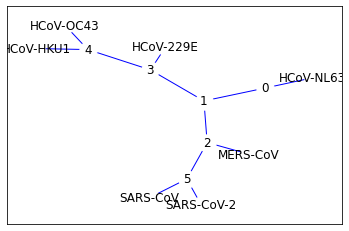

In [198]:
mat = [list(i) for i in score_matrix]

G = nx.Graph()
true_names = {i: [a[i][0], 1] for i in range(len(mat))}
n = len(true_names) - 2

for x in range(n, -1, -1):
  max_score = mat[len(mat) - 1][0]

  for i in range(len(mat)):
    for j in range(i + 1):
      if i != j:
        if mat[i][j] > max_score:
          max_score = mat[i][j]
          ind_1 = i
          ind_2 = j
          
  print(f'max_score: {max_score} between:')
  print(f'{true_names[ind_1][0]} and {true_names[ind_2][0]}')
  print(f'add new node: anchestor #{x}')
  print()
  anchestor = f'{x}'
  G.add_edges_from([(true_names[ind_1][0], anchestor), (true_names[ind_2][0], anchestor)])

  n_i = true_names[ind_1][1]
  n_j = true_names[ind_2][1]
  Q = np.zeros((len(mat) - 1, len(mat) - 1))
  for i in range(len(Q)):
    for j in range(i + 1):
      if i != j:
        if j == ind_1:
          c = 1 if i >= ind_2 else 0
          Q[i][j] = (n_i*mat[i + c][ind_1] + n_j*mat[i + c][ind_2])/(n_i + n_j)
        else:
          c = 1 if i >= ind_2 else 0
          d = 1 if j >= ind_2 else 0
          Q[i][j] = mat[i + c][j + d]

  true_names[min(ind_1, ind_2)] = [anchestor, true_names[ind_1][1] + true_names[ind_2][1]]
  for i in range(max(ind_1, ind_2), len(true_names) - 1):
    true_names[i] = true_names[i + 1]
  del true_names[len(true_names) - 1]

  mat = [list(i) for i in Q]

nx.draw_networkx(G, pos = nx.spring_layout(G), node_color = 'w', edge_color='b')